## This file helps me decide which columns I would like analyze in this project. In the end, I decide to chose created at, statuses_count, retweeted, text, user_id, username, user_desc, followers count, location, and verified user. Please read the file below for reasoning. 


In [ ]:
['created_at',
 'id',
 'is_quote_status',
 'retweeted',
 'text',
 'user',
 'user_id',
 'username',
 'user_desc',
 'user.followers_count',
 'verified_user']

In [1]:
tweets_spark = spark.read.parquet('gs://' + 'msca-bdp-students-bucket' + '/shared_data/sanchit/tweets')


22/12/08 03:18:23 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


#### EDA performed below. I have reduced to 10000 rows to understand where the significant null values are and have removed those columns from my dataset. 

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_rows')
from itertools import compress 
from pyspark.sql.functions import *
from pyspark.sql.types import *
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')
warnings.simplefilter('ignore')

In [3]:
tweets_spark.count()

10000

In [3]:
tweets_spark.limit(1).toPandas()

,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,geo,...,retweeted_from,retweeted_status,source,text,timestamp_ms,truncated,tweet_text,user,withheld_copyright,withheld_in_countries
0,None,Tue May 24 22:09:56 +0000 2022,None,"([], None, [], [], [(28785486, 28785486, [3, 7...",None,None,0,False,low,None,...,ABC,"(None, Tue May 24 21:54:24 +0000 2022, [0, 140...","<a href=""http://twitter.com/download/iphone"" r...","RT @ABC: “Why are you here?!""\n\nA furious Sen...",1653430196731,False,"“Why are you here?!""\n\nA furious Sen. Chris M...","(False, Thu Mar 05 21:39:02 +0000 2009, False,...",None,None


In [6]:
tweets_df = tweets_spark.toPandas()

In [53]:
tweets_df.columns

Index(['coordinates', 'created_at', 'display_text_range', 'entities',
       'extended_entities', 'extended_tweet', 'favorite_count', 'favorited',
       'filter_level', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'quote_count', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_text', 'reply_count', 'retweet_count', 'retweeted',
       'retweeted_from', 'retweeted_status', 'source', 'text', 'timestamp_ms',
       'truncated', 'tweet_text', 'user', 'withheld_copyright',
       'withheld_in_countries'],
      dtype='object')

In [54]:
tweets_df['retweeted']
#checking what retweeted looks like
#this column is clean and if it has RT then it suggests that it is retweeted, otherwise it is considered an original tweet

0       RT
1         
2       RT
3         
4       RT
        ..
9995    RT
9996    RT
9997    RT
9998    RT
9999    RT
Name: retweeted, Length: 10000, dtype: object

In [55]:
tweets_df.iloc[0]

coordinates                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

**Count number of null columns**

In [7]:
tweets_null = tweets_df.isna().sum()

Text(0.5, 1.0, 'Do Variables Have Significant Null Values?')

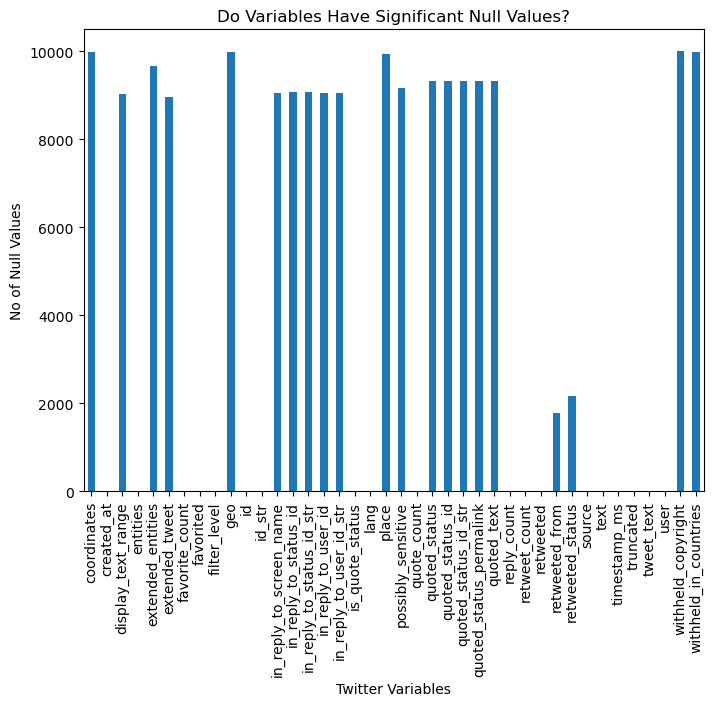

In [11]:
ax = tweets_null.plot(kind='bar', figsize=(8,6))
#plt.xlabel()
plt.ylabel('No of Null Values')
plt.xlabel('Twitter Variables')
plt.title('Do Variables Have Significant Null Values?')

In [88]:
tweets_key = tweets_df.drop(['coordinates','display_text_range',\
                               'extended_entities','extended_tweet',\
                               'geo','in_reply_to_screen_name',\
                               'in_reply_to_status_id','in_reply_to_status_id_str',\
                               'in_reply_to_user_id','in_reply_to_user_id_str',\
                               'possibly_sensitive',\
                               'quoted_status','quoted_status_id',\
                               'quoted_status_id_str','quoted_status_permalink',\
                                'quoted_text','retweeted_from',\
                                'retweeted_status','withheld_copyright',\
                                'withheld_in_countries'],axis=1)  


In [61]:
tweets_key.columns

Index(['created_at', 'entities', 'favorite_count', 'favorited', 'filter_level',
       'id', 'id_str', 'is_quote_status', 'lang', 'quote_count', 'reply_count',
       'retweet_count', 'retweeted', 'source', 'text', 'timestamp_ms',
       'truncated', 'tweet_text', 'user'],
      dtype='object')

In [63]:
tweets_key['quote_count']
#all quote counts are zero

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: quote_count, Length: 10000, dtype: int64

In [72]:
tweets_key['text']

0       RT @ABC: “Why are you here?!"\n\nA furious Sen. Chris Murphy demands answers from senators following Texas school shooting.\n\n“Why do you spen…
1       Indiana High School Softball | Live Streaming\nTBA vs Fishers\nEastbrook vs Oak Hill\nTBA vs Wabash\nSouth Newton vs Cl… https://t.co/QvvQQUUOG8
2           RT @jaketapper: Fifteen have been killed in a shooting at Robb elementary school, according to Governor Greg Abbott —  14 students and 1 te…
3           #Uvalde is just another reason why you should home school your kids. Exposing your kids to the degenerate version o… https://t.co/KiEpSzUJtf
4            RT @Josh_Moon: 14 dead elementary school kids. 14. Not from CRT. Or "woke" history. Which red states took great pains to ban. But from our…
                                                                              ...                                                                       
9995    RT @andreaton33: Original compiler of list unknown, but my gratitude for t

In [64]:
tweets_key.describe()
#favorite count, quote count, reply_count, retweet_count do not have any useful info
#all values are zero so they can be dropped

,favorite_count,id,quote_count,reply_count,retweet_count
count,10000.0,1.000000e+04,10000.0,10000.0,10000.0
mean,0.0,1.529803e+18,0.0,0.0,0.0
std,0.0,1.234376e+15,0.0,0.0,0.0
min,0.0,1.529222e+18,0.0,0.0,0.0
25%,0.0,1.529223e+18,0.0,0.0,0.0
50%,0.0,1.529224e+18,0.0,0.0,0.0
75%,0.0,1.529257e+18,0.0,0.0,0.0
max,0.0,1.532545e+18,0.0,0.0,0.0


In [66]:
tweets_key_1 = tweets_key.drop(['favorite_count','quote_count',\
                                'reply_count','retweet_count'],axis=1)  
#drop all 4 columns since they are zero

In [67]:
tweets_key_1.columns

Index(['created_at', 'entities', 'favorited', 'filter_level', 'id', 'id_str',
       'is_quote_status', 'lang', 'retweeted', 'source', 'text',
       'timestamp_ms', 'truncated', 'tweet_text', 'user'],
      dtype='object')

**EDA of null values suggests that these are the only columns worth keeping to create an analysis**

# We will select columns from above that are useful as evidenced from our EDA - please see below for further rationale.

**We would like the columns created_at because we want to understand distribution of tweets over time. Entities do not matter to us since we are analyzing profiles of Twitterers. Favorited does not matter us since whether this Tweet has been liked by the authenticating user is not going to have significance on Twitterers profiles. Filter_level does not matter to us since the maximum value of the filter_level parameter which may be used and still stream this Tweet is not going to have significance on Twitterers profiles. ID is important as it references the user by a unique number. is_quote_status matters to understand originality/uniqueness. Lang will not be kept as we already filtered for 'en' in the previous file. Retweeted will be kept for retweet analysis. Source, timestamp_ms does not have valuable info. Text will be kept for analysis of words used but not tweet_text as they are similar. Large majority of truncated is false so is not useful. User will be kept for analysis of Twitterers - they key columns required from user are id, name, description, user verified and follower count.**

In [73]:
tweets_master = tweets_spark.select([tweets_spark.created_at,
                         tweets_spark.id,
                         tweets_spark.is_quote_status, 
                         tweets_spark.retweeted,    
                         tweets_spark.text,                                      
                         tweets_spark.user,
                         tweets_spark.user['id'].alias("user_id"),
                         tweets_spark.user['name'].alias("username"), 
                         tweets_spark.user['description'].alias("user_desc"), 
                         tweets_spark.user['followers_count'], 
                         tweets_spark.user.verified.alias("verified_user")])

In [75]:
tweets_master.columns

['created_at',
 'id',
 'is_quote_status',
 'retweeted',
 'text',
 'user',
 'user_id',
 'username',
 'user_desc',
 'user.followers_count',
 'verified_user']

**I forgot to include location in the master dataframe column - adding here below.**

In [89]:
tweets_master_location = tweets_spark.select([tweets_spark.created_at,
                         tweets_spark.id,
                         tweets_spark.is_quote_status, 
                         tweets_spark.retweeted,    
                         tweets_spark.text,                                      
                         tweets_spark.user,
                         tweets_spark.place.country.alias("country"),
                         tweets_spark.user['id'].alias("user_id"),
                         tweets_spark.user['name'].alias("username"), 
                         tweets_spark.user['description'].alias("user_desc"), 
                         tweets_spark.user['followers_count'].alias("followers_count"),
                         tweets_spark.user['location'].alias("location"),
                         tweets_spark.user.verified.alias("verified_user")])

In [90]:
tweets_master_location.limit(1).toPandas()

,created_at,id,is_quote_status,retweeted,text,user,country,user_id,username,user_desc,followers_count,location,verified_user
0,Tue May 24 22:09:56 +0000 2022,1529223198327287808,False,RT,"RT @ABC: “Why are you here?!""\n\nA furious Sen. Chris Murphy demands answers from senators following Texas school shooting.\n\n“Why do you spen…","(False, Thu Mar 05 21:39:02 +0000 2009, False, False, 💙⚾️💛🏀💜🏒🖤, 14148, 71, 637, True, 22983536, 22983536, False, 0, Los Angeles, shiaoma, 000000, http://abs.twimg.com/images/themes/theme10/bg.gif, https://abs.twimg.com/images/themes/theme10/bg.gif, False, None, http://pbs.twimg.com/profile_images/2301998319/image_normal.jpg, https://pbs.twimg.com/profile_images/2301998319/image_normal.jpg, ABB8C2, 000000, 000000, 000000, False, False, shiaoma, 2248, none, None, False, [])",None,22983536,shiaoma,💙⚾️💛🏀💜🏒🖤,71,Los Angeles,False
